In [ ]:
### Ml workflow

1) Business Understanding/Problem Statement/ Usecase

2) Analytic Approach-> ML/CV/NLP

3) Data Req and Data Collection

4) Data Understanding/Data Visualization

5) Data Preparation /Data Cleaning/Data Processing

6) Modelling and Evaluation

7) Deployment and Feedback

In [ ]:
### Analytic Approach

ML -> Structured Data

CV + DL-> Images/Videos

NLP +DL-> Text/Audio

In [ ]:
Structured Data -> ML

Dependent Variable in a PS?

Yes-> Supervised Learning

No-> Unsupervised Learning

In [ ]:
### Import the libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
### Load the dataset
df=pd.read_csv("/content/auto-mpg.csv")


In [ ]:
### Display the first 5 rows
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
### Display random 10 records
df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
153,18.0,6,250.0,105,3459,16.0,75,1,chevrolet nova
86,14.0,8,304.0,150,3672,11.5,73,1,amc matador
363,22.4,6,231.0,110,3415,15.8,81,1,buick century
228,18.5,6,250.0,98,3525,19.0,77,1,ford granada
266,30.0,4,98.0,68,2155,16.5,78,1,chevrolet chevette
164,21.0,6,231.0,110,3039,15.0,75,1,buick skyhawk
133,16.0,6,250.0,100,3781,17.0,74,1,chevrolet chevelle malibu classic
289,16.9,8,350.0,155,4360,14.9,79,1,buick estate wagon (sw)
385,38.0,4,91.0,67,1995,16.2,82,3,datsun 310 gx
318,29.8,4,134.0,90,2711,15.5,80,3,toyota corona liftback


In [ ]:
### Number of rows and columns
df.shape

(398, 9)

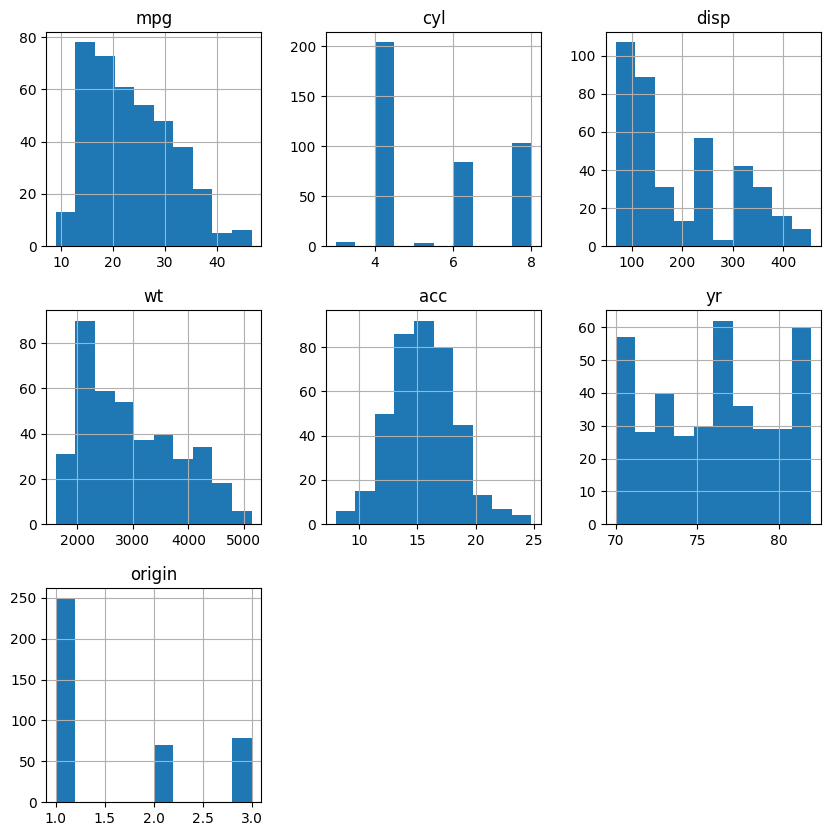

In [ ]:
df.hist(figsize=(10,10))
plt.show()
### numerical columns

In [ ]:
df["cyl"].unique()

array([8, 4, 6, 3, 5])

In [ ]:
df["cyl"].value_counts()

,count
cyl,
4,204
8,103
6,84
3,4
5,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df["hp"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
df[df["hp"]=="?"]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [ ]:
df.describe(include="all")

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


<Axes: xlabel='origin', ylabel='count'>

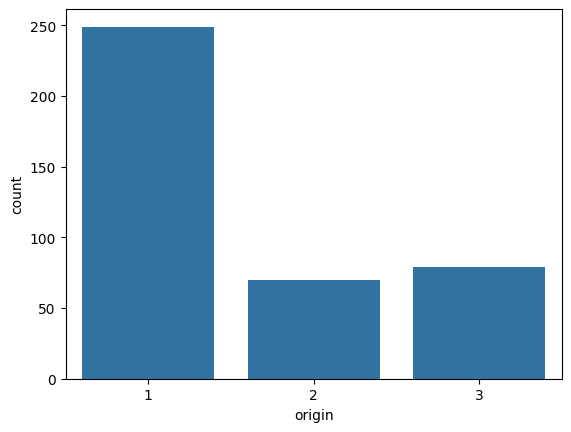

In [ ]:
sns.countplot(x="origin",data=df)

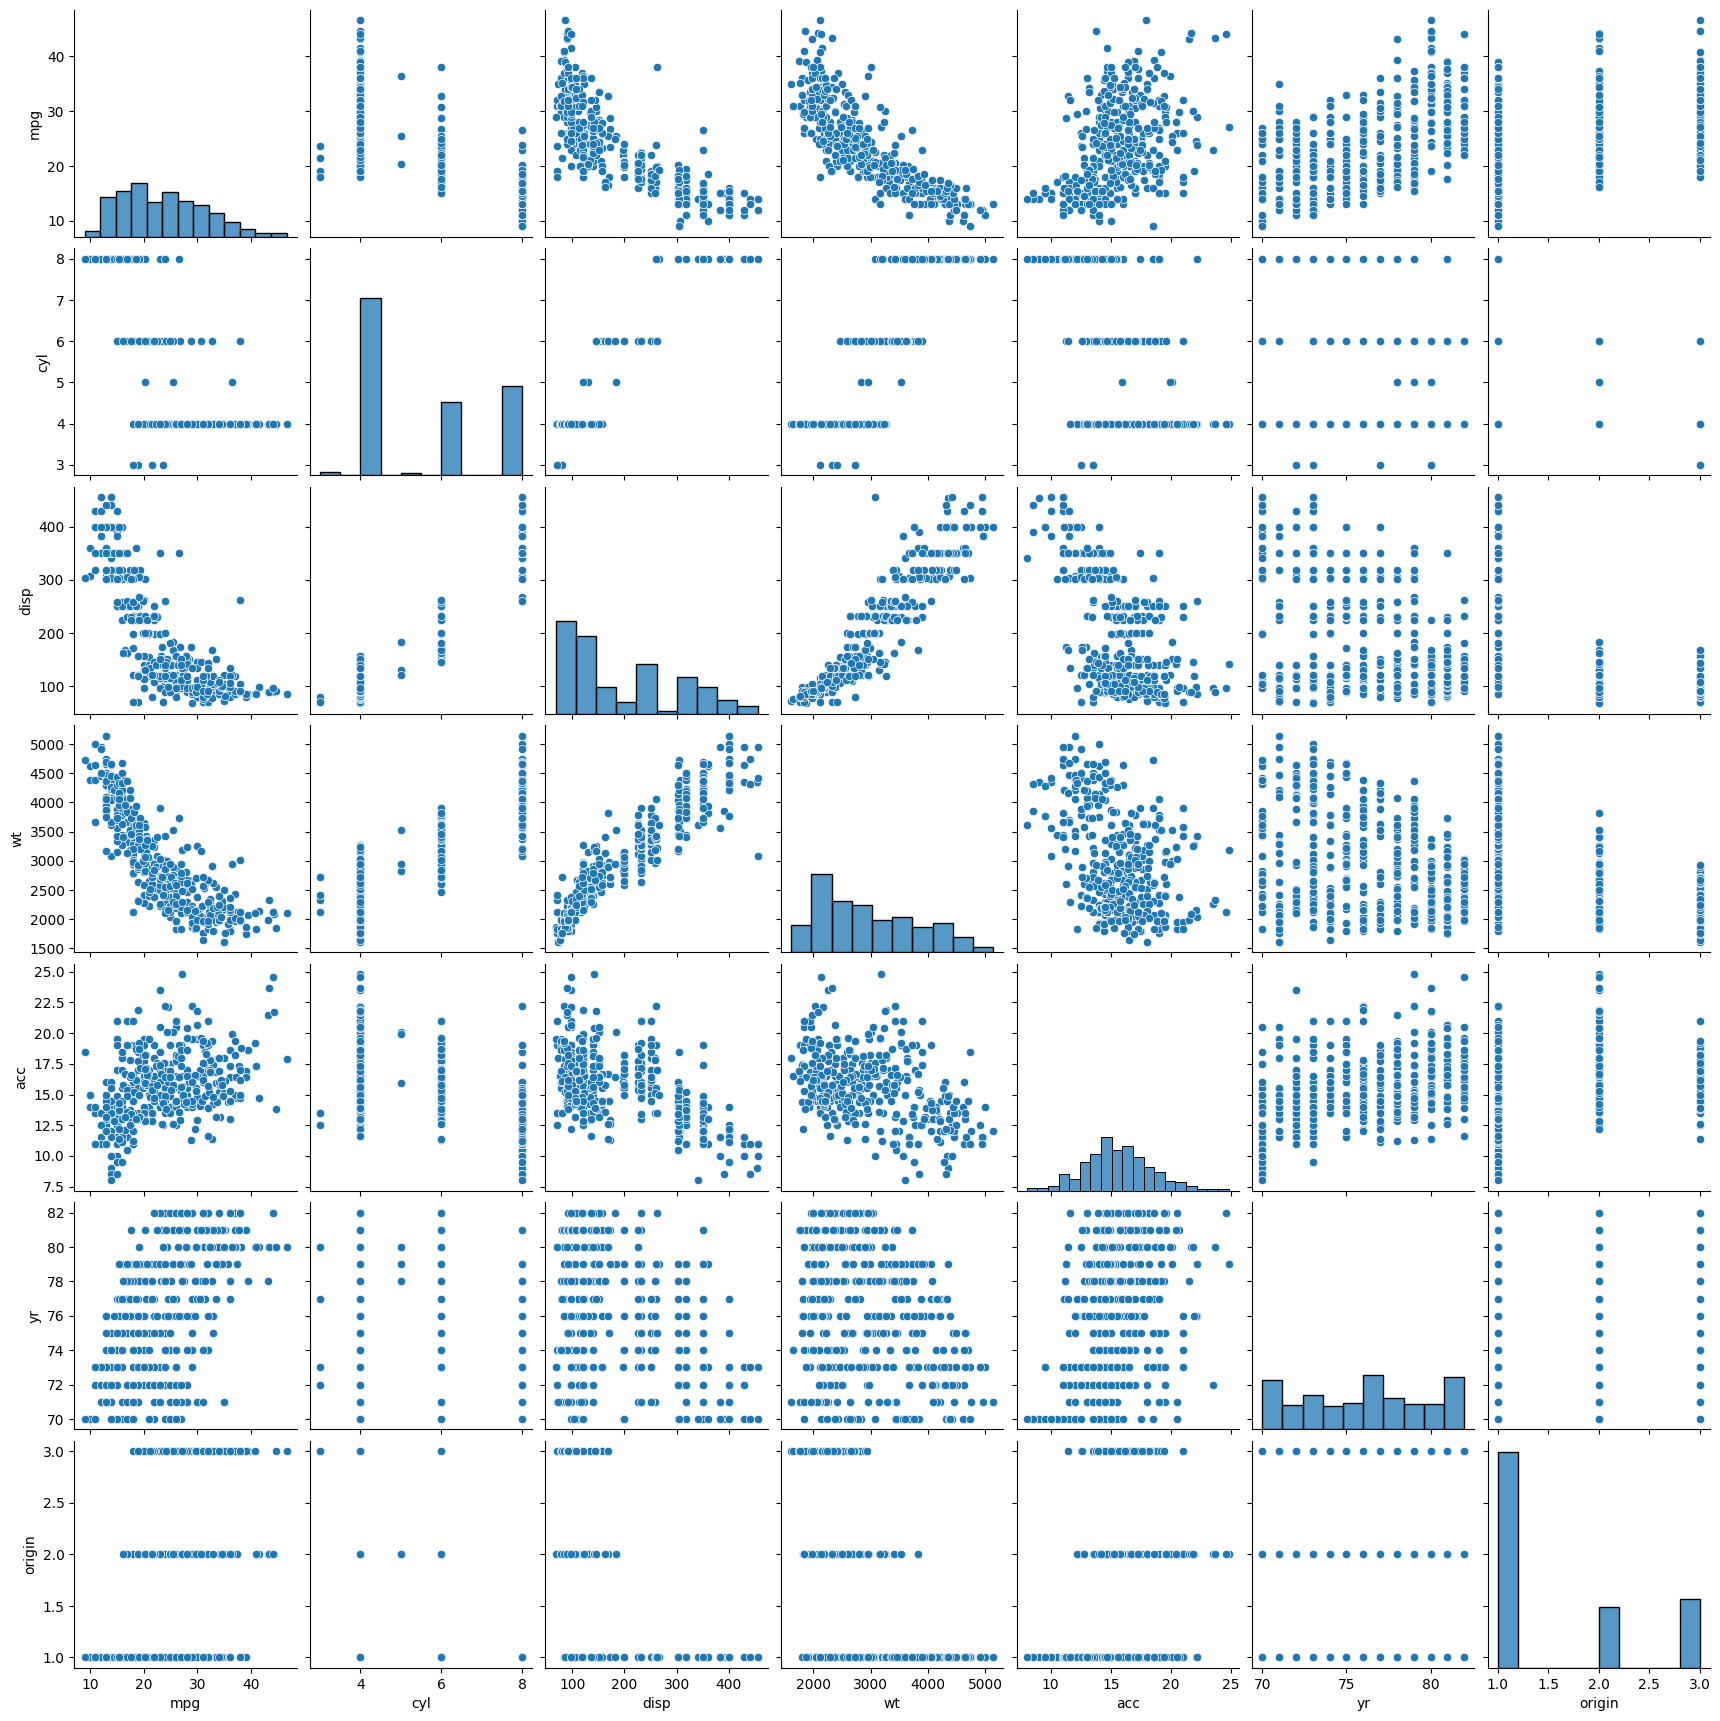

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr(numeric_only=True)

,mpg,cyl,disp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
wt,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [ ]:

### Data Preparation
1)Missing values-> hp -> obj(int/float)
2) Drop car name
3) Categorical-> Origin(1,2,3)

In [ ]:
### Drop insignificant column/columns
df=df.drop("car name",axis=1) #axis=1 represent column,axis=0 represent row

In [ ]:
df.shape

(398, 8)

In [ ]:
### Replace the missing values with mean/median
df["hp"]=df["hp"].replace("?",np.nan)


In [ ]:
df["hp"]=df["hp"].astype(float)

In [ ]:
median_hp=df["hp"].median()
median_hp

93.5

In [ ]:
df["hp"]=df["hp"].replace(np.nan,median_hp)

In [ ]:
df.dtypes

,0
mpg,float64
cyl,int64
disp,float64
hp,float64
wt,int64
acc,float64
yr,int64
origin,int64


In [ ]:
df["hp"].unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. ,  93.5, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,
        83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,
        98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,
        68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. ,
       125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,
        64. ,  74. , 116. ,  82. ])

In [ ]:
y=df[["mpg"]]
x=df.drop("mpg",axis=1)

In [ ]:
from sklearn.model_selection import train_test_split #split the data
from sklearn.linear_model import LinearRegression #algorithm
from sklearn.tree import DecisionTreeRegressor #algorithm
from sklearn.ensemble import RandomForestRegressor #algorithm

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model_lr=LinearRegression() #instantiating model1

In [ ]:
model_lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
model_lr.score(x_train,y_train)

0.8178839090394256

In [ ]:
model_lr.score(x_test,y_test)

0.8240152422960028

In [ ]:
model_dt=DecisionTreeRegressor(max_depth=4) # max_depth is a hyperparameter

In [ ]:
model_dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
model_dt.score(x_train,y_train)

0.8935476512116222

In [ ]:
model_dt.score(x_test,y_test)

0.8059735817170557

In [ ]:
model_rf=RandomForestRegressor(n_estimators=25,max_depth=3)

In [ ]:
model_rf.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=3, n_estimators=25)

In [ ]:
model_rf.score(x_train,y_train)

0.8796770799168508

In [ ]:
model_rf.score(x_test,y_test)

0.8390821496133897

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model_abr=AdaBoostRegressor(n_estimators=47)
model_abr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



AdaBoostRegressor(n_estimators=47)

In [ ]:
print(model_abr.score(x_train,y_train))
print(model_abr.score(x_test,y_test))

0.8967759211165163
0.8538923913389576


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr=GradientBoostingRegressor(n_estimators=11,learning_rate=0.1)
model_gbr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor(n_estimators=11)

In [ ]:
print(model_gbr.score(x_train,y_train))
print(model_gbr.score(x_test,y_test))

0.7989537721274513
0.7395605197138815


In [ ]:
from sklearn.svm import SVR